## **Exercício com pré processamento dos dados**

In [166]:
import pandas as pd
import numpy as np

def normalizar(x): #x será uma lista de valores numéricos
  return (x - np.min(x))/(np.max(x) - np.min(x))

def padronizar(x):
  return (x -np.mean(x))/np.std(x)

df = pd.read_csv("/content/drive/MyDrive/datasets/fertility_Diagnosis.txt")

In [167]:
df.head(5)

,temporada,idade,doencas_infantis,acidente,cirurgia,febre,alcool,fumo,sentado,classe
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O


In [168]:
# VERIFICAR COLUNAS COM VALORES NULOS E QUANTIDADE

df.isna().sum()

temporada           0
idade               0
doencas_infantis    0
acidente            0
cirurgia            0
febre               0
alcool              0
fumo                0
sentado             0
classe              0
dtype: int64

In [169]:
# replace para a coluna classe, pmde N sera 1 e O será 0

df['classe'].replace(['N', 'O'], [1, 0], inplace=True)
df.head(5)


,temporada,idade,doencas_infantis,acidente,cirurgia,febre,alcool,fumo,sentado,classe
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,1
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,0
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,1
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,1
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,0


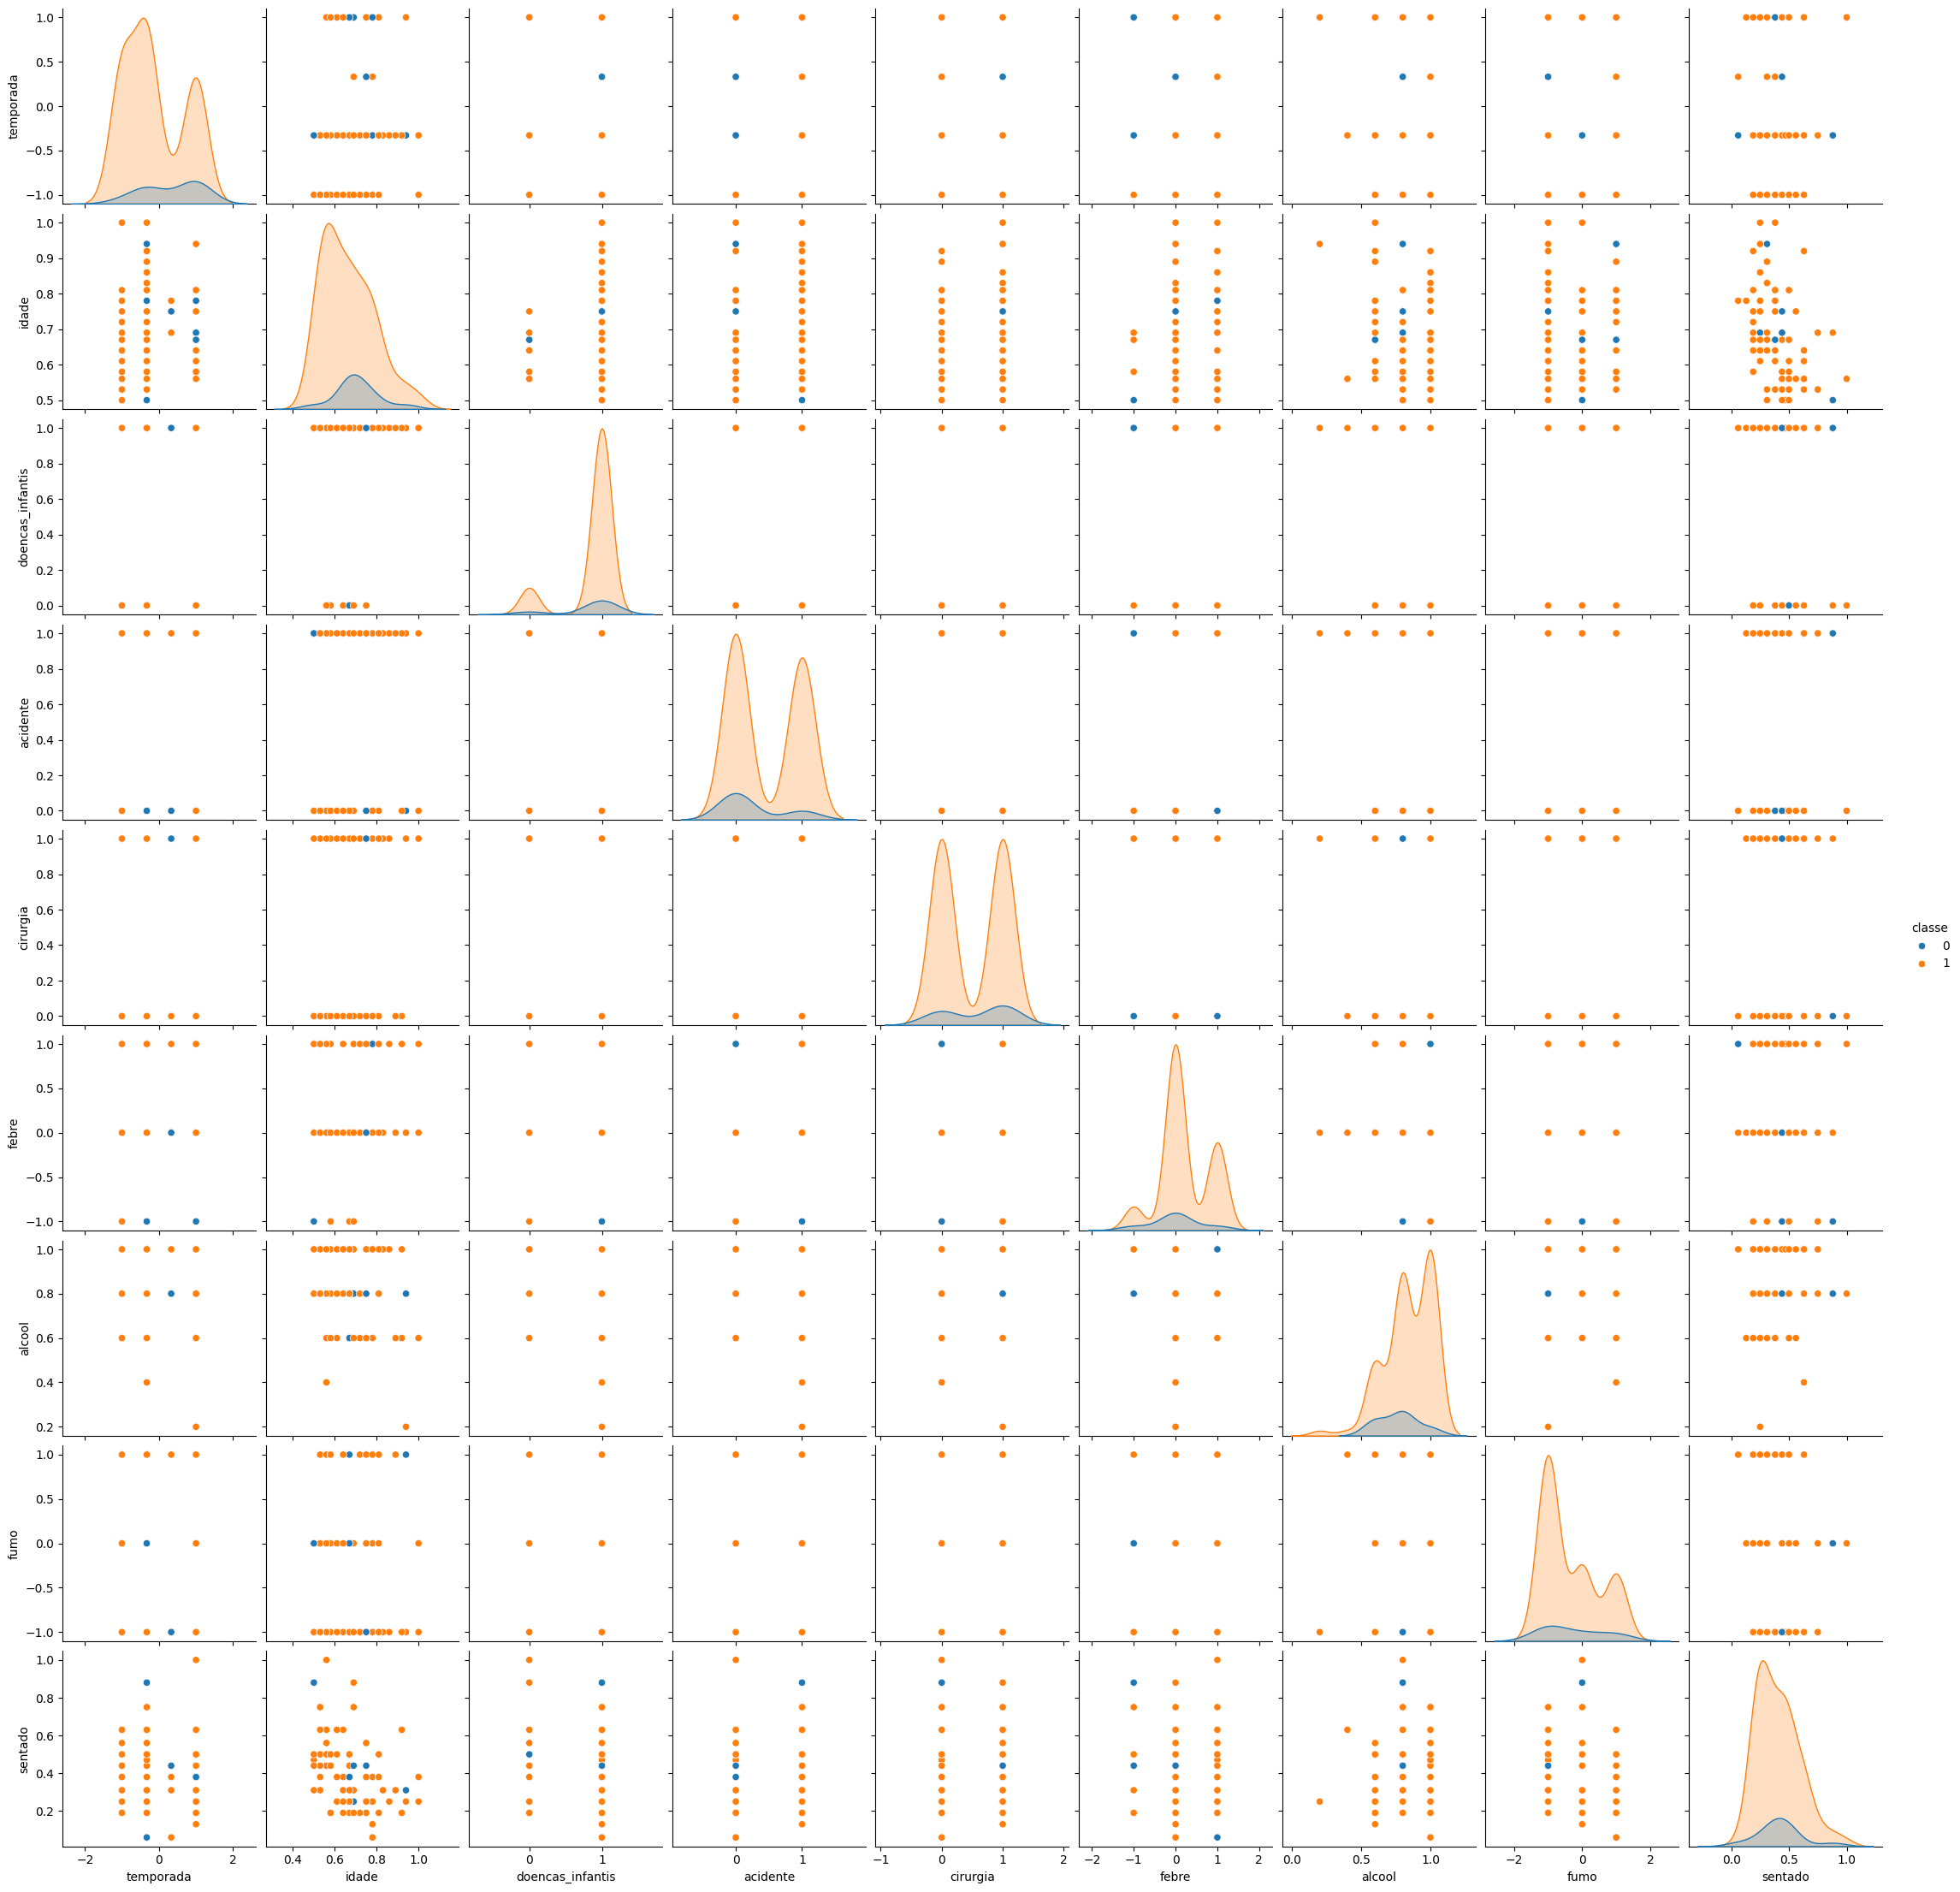

In [170]:
import seaborn as sb
sb.pairplot(df[['temporada',	'idade',	'doencas_infantis',	'acidente',	'cirurgia',	'febre',	'alcool',	'fumo',	'sentado',	'classe']], hue='classe')

In [171]:
from scipy.stats import shapiro
# Verificar normalidade usando o teste de Shapiro-Wilk
def verifica_normalidade(dataframe, coluna):
    coluna_data = dataframe[coluna]
    # Realizar o teste de Shapiro-Wilk
    statistic, p_valor = shapiro(coluna_data)
    # Definir o nível de significância
    nivel_significancia = 0.1
    # Verificar se a hipótese nula de normalidade pode ser rejeitada
    if p_valor > nivel_significancia:
        print(f"A coluna '{coluna}' segue uma distribuição normal")
        return True
    else:
        print(f"A coluna '{coluna}' não segue uma distribuição normal")
        return False

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   temporada         100 non-null    float64
 1   idade             100 non-null    float64
 2   doencas_infantis  100 non-null    int64  
 3   acidente          100 non-null    int64  
 4   cirurgia          100 non-null    int64  
 5   febre             100 non-null    int64  
 6   alcool            100 non-null    float64
 7   fumo              100 non-null    int64  
 8   sentado           100 non-null    float64
 9   classe            100 non-null    int64  
dtypes: float64(4), int64(6)
memory usage: 7.9 KB


In [173]:
# Chamando a função para verificar normalidade
for coluna in ['temporada',	'idade',	'doencas_infantis',	'acidente',	'cirurgia',	'febre',	'alcool',	'fumo',	'sentado']:
  if verifica_normalidade(df, coluna):
    df[coluna] = padronizar(df[coluna])#se for distribuição normal, padroniza
  else:#senão, normaliza
    df[coluna] = normalizar(df[coluna])

A coluna 'temporada' não segue uma distribuição normal
A coluna 'idade' não segue uma distribuição normal
A coluna 'doencas_infantis' não segue uma distribuição normal
A coluna 'acidente' não segue uma distribuição normal
A coluna 'cirurgia' não segue uma distribuição normal
A coluna 'febre' não segue uma distribuição normal
A coluna 'alcool' não segue uma distribuição normal
A coluna 'fumo' não segue uma distribuição normal
A coluna 'sentado' não segue uma distribuição normal


In [174]:
df

,temporada,idade,doencas_infantis,acidente,cirurgia,febre,alcool,fumo,sentado,classe
0,0.335,0.38,0.0,1.0,1.0,0.5,0.75,0.5,0.872340,1
1,0.335,0.88,1.0,0.0,1.0,0.5,0.75,1.0,0.265957,0
2,0.335,0.00,1.0,0.0,0.0,0.5,1.00,0.0,0.468085,1
3,0.335,0.50,0.0,1.0,1.0,0.5,1.00,0.0,0.340426,1
4,0.335,0.34,1.0,1.0,0.0,0.5,0.75,0.0,0.468085,0
...,...,...,...,...,...,...,...,...,...,...
95,0.000,0.34,1.0,0.0,0.0,0.5,1.00,0.0,0.468085,1
96,0.000,0.22,1.0,0.0,0.0,0.5,0.75,0.5,0.468085,1
97,0.000,0.34,1.0,1.0,1.0,0.5,1.00,0.0,0.265957,1
98,0.000,0.28,1.0,0.0,1.0,0.5,1.00,0.5,0.138298,1


In [175]:
df['classe'].unique()

array([1, 0])

In [176]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

y = df['classe']
X = df[['temporada',	'idade',	'doencas_infantis',	'acidente',	'cirurgia',	'febre',	'alcool',	'fumo',	'sentado'	]]

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [177]:
knn = KNeighborsClassifier(n_neighbors=11)

# Treinar o modelo kNN
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [178]:
y_pred = knn.predict(X_test)

# Avaliar a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo kNN:", accuracy)

Acurácia do modelo kNN: 0.9


In [179]:
print("n=",len(y))
print("k=", (len(y))**0.5)

n= 100
k= 10.0


In [180]:
#testando o k ideal
for k in range(1, 51, 2):
  knn = KNeighborsClassifier(n_neighbors=k)
  # Treinar o modelo kNN
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)

  # Avaliar a acurácia do modelo
  accuracy = accuracy_score(y_test, y_pred)
  print(f"Acurácia para k={k}:", accuracy)

Acurácia para k=1: 0.9
Acurácia para k=3: 0.9
Acurácia para k=5: 0.85
Acurácia para k=7: 0.85
Acurácia para k=9: 0.9
Acurácia para k=11: 0.9
Acurácia para k=13: 0.9
Acurácia para k=15: 0.9
Acurácia para k=17: 0.9
Acurácia para k=19: 0.9
Acurácia para k=21: 0.9
Acurácia para k=23: 0.9
Acurácia para k=25: 0.9
Acurácia para k=27: 0.9
Acurácia para k=29: 0.9
Acurácia para k=31: 0.9
Acurácia para k=33: 0.9
Acurácia para k=35: 0.9
Acurácia para k=37: 0.9
Acurácia para k=39: 0.9
Acurácia para k=41: 0.9
Acurácia para k=43: 0.9
Acurácia para k=45: 0.9
Acurácia para k=47: 0.9
Acurácia para k=49: 0.9


In [181]:
# Selecionar o primeiro exemplo do conjunto de teste
exemplo = X_test.iloc[[0]]
saida_real = y_test.iloc[0]

# Fazer a previsão com o modelo treinado
previsao = knn.predict(exemplo)

# Imprimir a previsão e a saída real
print("Previsão:", previsao[0])
print("Saída Real:", saida_real)

Previsão: 1
Saída Real: 1


In [182]:
# Fazer previsões para todo o conjunto de teste
previsoes = knn.predict(X_test)

# Criar um DataFrame para comparar as previsões com as saídas reais
comparacao = pd.DataFrame({'Previsão': previsoes, 'Saída Real': y_test})

# Mostrar o DataFrame de comparação
comparacao

,Previsão,Saída Real
83,1,1
53,1,1
70,1,0
45,1,1
44,1,1
39,1,1
22,1,1
80,1,1
10,1,1
0,1,1
